This CSV dataset contains information pertaining to various Zomato restaurants in Mumbai, like restaurant names, cuisine, ratings,
votes, location, etc
This dataset will help you with answering various questions, like which is the highest rated Seafood Restaurant, or which locality has
the best Japanese restaurants, and so on.

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
pio.renderers.default = "svg"

In [4]:
raw_df = pd.read_csv('Zomato Chennai Dataset.csv')

In [5]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [6]:
raw_df.shape

(12032, 12)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [8]:
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


In [9]:
# Dropping columns which are not required for further analysis
raw_df.drop(['Zomato URL'], axis = 1, inplace=True)

In [10]:
raw_df.head()

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [11]:
# Checking for Null records
raw_df.isnull().sum()

Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [12]:
# Droping the above row from the dataset
raw_df = raw_df.drop(labels=12029, axis=0)

In [13]:
# Replacing the other null records with NA
raw_df.fillna('NA', inplace=True)

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\1701901264.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [14]:
# Confirming all the null records are correct
raw_df.isnull().sum()

Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [15]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['Dining Rating'].value_counts()
raw_df['Delivery Rating'].value_counts()
raw_df['Dining Rating Count'].value_counts()
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
NA                              219
27                               34
37                               30
                               ... 
3530                              1
7705                              1
6374                              1
1773                              1
1617                              1
Name: count, Length: 2282, dtype: int64

In [16]:
# Replacing the text values with '0'
raw_df['Delivery Rating Count'].replace(to_replace=['','Not enough Delivery Reviews','Does not offer Delivery', 'NA'], value='0', inplace=True)

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\3864021314.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [17]:
# Checking for text values in the column before converting it to numeric datatype
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
0       5869
27        34
22        30
37        30
60        30
        ... 
6374       1
3677       1
588        1
6125       1
1617       1
Name: count, Length: 2279, dtype: int64

In [18]:
raw_df['Dining Rating'].replace(to_replace=['','NA'], value='0', inplace=True)

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\4023337739.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [19]:
raw_df['Dining Rating'].value_counts()

Dining Rating
0      5350
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [20]:
raw_df['Delivery Rating'].replace(to_replace=['','NA'], value='0', inplace=True)

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\1019815135.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [21]:
raw_df['Delivery Rating'].value_counts()

Delivery Rating
0      5850
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
2.3       5
2.2       5
2.0       5
1.8       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [22]:
raw_df['Dining Rating'].replace(to_replace=['','NA'], value='0', inplace=True)

In [23]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
877                             1
897                             1
872                             1
1197                            1
224                             1
Name: count, Length: 794, dtype: int64

In [24]:
raw_df['Dining Rating Count'].replace(to_replace=['','Not enough Dining Reviews','Does not offer Dining', 'NA'], value='0', inplace=True)

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\323551734.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [25]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
0       5370
4        339
5        271
6        248
8        180
        ... 
877        1
897        1
872        1
1197       1
224        1
Name: count, Length: 791, dtype: int64

In [26]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12031 entries, 0 to 12031
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12031 non-null  object 
 1   Address                12031 non-null  object 
 2   Location               12031 non-null  object 
 3   Cuisine                12031 non-null  object 
 4   Top Dishes             12031 non-null  object 
 5   Price for 2            12031 non-null  float64
 6   Dining Rating          12031 non-null  object 
 7   Dining Rating Count    12031 non-null  object 
 8   Delivery Rating        12031 non-null  object 
 9   Delivery Rating Count  12031 non-null  object 
 10  Features               12031 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [27]:
# Changing Data Type of the numerical columns
raw_df['Dining Rating'] = raw_df['Dining Rating'].astype('float64')
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].astype('float64')

In [28]:
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('int64')
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype('int64')

In [29]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12031 entries, 0 to 12031
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12031 non-null  object 
 1   Address                12031 non-null  object 
 2   Location               12031 non-null  object 
 3   Cuisine                12031 non-null  object 
 4   Top Dishes             12031 non-null  object 
 5   Price for 2            12031 non-null  float64
 6   Dining Rating          12031 non-null  float64
 7   Dining Rating Count    12031 non-null  int64  
 8   Delivery Rating        12031 non-null  float64
 9   Delivery Rating Count  12031 non-null  int64  
 10  Features               12031 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.1+ MB


In [30]:
raw_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...
12026,CK's Sandwiches,Delivery Only,Thuraipakkam,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12027,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0,0.0,0,"['Breakfast', 'Delivery Only']"


In [31]:
# Removing the bracket character from Days column
remove_quotes = lambda x: x.replace("'", "").strip() if isinstance(x, str) else x

In [32]:
raw_df=raw_df.applymap(remove_quotes)

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\3286075648.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [33]:
raw_df['Features'] = raw_df['Features'].str.replace(']', '')
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(']', '')
raw_df['Features'] = raw_df['Features'].str.replace('[', '')
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace('[', '')
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace(']', '')
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace('[', '')
raw_df.head()

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN R...",Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fund...",Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba H...",Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, C...",Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


In [34]:
zomato_df = raw_df.copy()

In [35]:
zomato_df.to_csv('CHENNAI_Zomato.csv', header=True, index=False)

In [36]:
zomato_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN R...",Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fund...",Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba H...",Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, C...",Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...,...
12026,CKs Sandwiches,Delivery Only,Thuraipakkam,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12027,CKs Sandwiches,Delivery Only,Porur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12028,CKs Sandwiches,Delivery Only,Kolathur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12030,CKs Sandwiches,Delivery Only,Ramapuram,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"


# Splitting the column and storing it in temp_df dataframe

 Copying the cleaned data into a new DataFrame

In [238]:
# Replacing Small regions with Known region name
zomato_df['Location'] = zomato_df['Location'].str.replace(r'Chandra Metro Mall, Virugambakkam', 'Virugambakkam', regex=True)
zomato_df['Location'] = zomato_df['Location'].str.replace(r'Express Avenue Mall,Royapettah','Royapettah', regex=True)
zomato_df['Location'] = zomato_df['Location'].str.replace(r'Ponnis Grand Inn Hotel, Thiruvallur', 'Thiruvallur', regex=True)
zomato_df['Location'] = zomato_df['Location'].str.replace(r'Spectrum The Grand Venus Mall, Perambur', 'Perambur', regex=True)

In [240]:
zomato_df['Location'].value_counts()

Location
Porur                                                     418
Velachery                                                 372
Ambattur                                                  335
T. Nagar                                                  315
Perungudi                                                 288
                                                         ... 
The Vijay Park Hotel, Arumbakkam                            1
Green Coconut Resort, Kanchipuram District                  1
Hotel Maris, Gopalapuram                                    1
InterContinental Chennai Mahabalipuram Resort, East...      1
The Pride Hotel, Kilpauk                                    1
Name: count, Length: 261, dtype: int64

In [233]:
result = zomato_df[zomato_df['Location'].str.contains(',', na=False)]

In [242]:
result['Location'] = zomato_df['Location']

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\3715881041.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [236]:
#To keep only the value of the column after the comma
# Replacing Small regions with Known region name

def keep_after_comma(Location):
    return Location.split(', ')[1] if ', ' in Location else Location

In [224]:
result['Location'] = result['Location'].apply(keep_after_comma)

C:\Users\ANIRUDH\AppData\Local\Temp\ipykernel_6272\441890543.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:
zomato_df['Location'].value_counts()

Location
Porur                                                     418
Velachery                                                 372
Ambattur                                                  335
T. Nagar                                                  315
Perungudi                                                 288
                                                         ... 
The Vijay Park Hotel, Arumbakkam                            1
Green Coconut Resort, Kanchipuram District                  1
Hotel Maris, Gopalapuram                                    1
InterContinental Chennai Mahabalipuram Resort, East...      1
The Pride Hotel, Kilpauk                                    1
Name: count, Length: 261, dtype: int64

In [178]:
zomato_df.to_csv('CHENNAI_Zomato.csv', header=True, index=False)

In [179]:
result = zomato_df[zomato_df['Location'].str.contains(',', na=False)]

In [160]:
# Finding all the duplicate rows
zomato_df[zomato_df.duplicated()]

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating Type,Rating_Category


In [161]:
# Dropping all the duplicate rows
zomato_df = zomato_df.drop_duplicates()

In [180]:
zomato_df.head()

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating Type,Rating_Category
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",Average,Average
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN R...",Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",Average,Average
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fund...",Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",Average,Average
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba H...",Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver...",Good,Good
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, C...",Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating",Average,Average


In [182]:
zomato_df.to_csv('CHENNAI_Zomato.csv', header=True, index=False)

In [207]:
result_df = zomato_df[zomato_df['Location'].str.contains(',', na=False)]

In [208]:
result_df['Location']

18       Phoenix Market City, Velachery
82       Phoenix Market City, Velachery
102      Phoenix Market City, Velachery
105        Mayajaal Multiplex, Kanathur
127       The Westin Chennai, Velachery
                      ...              
11714         OMR Food Street, Navallur
11716      OMR Food Street, Injambakkam
11788    Phoenix Market City, Velachery
11789     Forum Vijaya Mall, Vadapalani
11790    Express Avenue Mall,Royapettah
Name: Location, Length: 625, dtype: object

In [181]:
# Replacing the Null values with 'NA'
zomato_df.fillna('NA', inplace=True)

In [183]:
# Finding those restaurant whose has 0 Rating or Votes
useless_data = (zomato_df['Dining Rating'] == 0.0) | (zomato_df['Delivery Rating'] == 0.0)
zomato_df[useless_data]

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating Type,Rating_Category


In [184]:
## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
zomato_df = zomato_df[~useless_data]

In [194]:
zomato_df = raw_df.copy()

In [195]:
# Function to categorize the Rating
# Apply the function to create a new column 'Rating_Category'
def categorize_rating(Rating):
    if Rating <=3:
        return 'Poor'
    elif Rating >4.5:
        return 'Excellant'
    elif Rating <=4:
        return 'Good'
    else:
        return 'Average'

In [196]:
zomato_df['Rating Type'] = zomato_df['Dining Rating'].apply(categorize_rating)

In [197]:
zomato_df['Rating_Category'] = zomato_df['Delivery Rating'].apply(categorize_rating)

In [244]:
zomato_df[zomato_df.duplicated()]

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating Type,Rating_Category
11496,Parantha Pundit,"44, Vanigar Street, Kovalam, Chennai",Kovalam,"North Indian, Beverages",Invalid,200.0,0.0,0,0.0,0,Delivery Only,Poor,Poor
11698,Hyku Foods,"11/597, Arunachalam Avenue, Baraniputhur Road,...",Porur,"Healthy Food, South Indian",Invalid,300.0,0.0,0,0.0,0,"Breakfast, Home Delivery",Poor,Poor
11732,Wangs Express,Delivery Only,Nandanam,"Chinese, Beverages",Invalid,600.0,0.0,0,0.0,0,Delivery Only,Poor,Poor
11733,Wangs Express,"Plot 4/553, MIG Type, Mogappair, Chennai",Mogappair,"Chinese, Beverages",Invalid,600.0,0.0,0,0.0,0,Delivery Only,Poor,Poor
11995,Sardarji Kulfi,Delivery Only,Anna Nagar East,Ice Cream,Invalid,150.0,0.0,0,0.0,0,Delivery Only,Poor,Poor


In [245]:
zomato_df = zomato_df.drop_duplicates()

In [246]:
zomatoChennai_df = zomato_df.copy()

In [199]:
!pip install -U kaleido

In [247]:
rating_type_df = zomatoChennai_df['Rating_Category'].value_counts().reset_index()
rating_type_df.rename(columns={'index':'Rating_Category', 'Rating_Category':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type_df

,COUNT OF RESTAURANTS,count
0,Poor,6057
1,Good,4612
2,Average,1329
3,Excellant,28


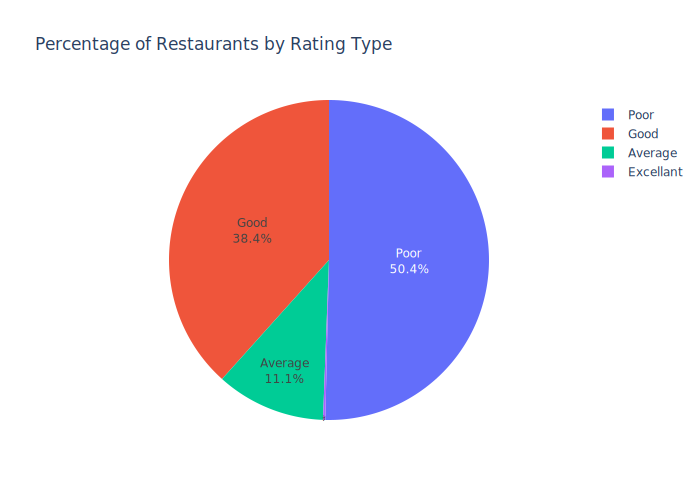

In [248]:
fig = px.pie(rating_type_df, names='COUNT OF RESTAURANTS', values='count', color='COUNT OF RESTAURANTS',
 title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [249]:
# Assuming restaurants having rating above 4.5
highest_rated_df = zomatoChennai_df[zomatoChennai_df['Dining Rating'] >=4.5]
highest_rated_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating Type,Rating_Category
15,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam,...",Purasavakkam,"South Indian, Desserts, Beverages","Pongal, Podi Dosa, Idli Sambar, Vada Curry,...",300.0,4.5,1094,0.0,0,"Breakfast, Vegetarian Only, Indoor Seating",Average,Poor
24,Eating Circles,"6, CP Ramaswamy Road, Alwarpet, Chennai",Alwarpet,South Indian,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",250.0,4.7,782,4.2,2744,"Breakfast, Home Delivery, Vegetarian Only, Ind...",Excellant,Average
37,Shree Mithai,"18, Dr TV Road, Chetpet, Chennai",Chetpet,"Mithai, Street Food, Fast Food","Chaat, Badam Milk, Pav Bhaji, Panipuri, Ra...",300.0,4.6,1085,4.4,18600,"Breakfast, Home Delivery, Vegetarian Only, Fre...",Excellant,Average
50,Andhikkadai,"20, Dhandeeswaram Main Road, Velachery, Chennai",Velachery,South Indian,"Coffee, Sweet Kozhukattai, Idli, Pongal, K...",200.0,4.6,908,4.2,17300,"Breakfast, Home Delivery, Vegetarian Only, Ind...",Excellant,Average
57,Brownie Heaven,"193, Peters Road, Opposite New College, Royape...",Royapettah,"Bakery, Desserts, Beverages","Vanilla Ice Cream, Brownie Shake, Filtered C...",350.0,4.9,842,4.3,2270,"Home Delivery, Indoor Seating, Desserts and Bakes",Excellant,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9279,Gastronomer By Double Roti,"4/27, Cenotaph, 1st Street, Teynampet, Chennai",Teynampet,"Cafe, American, Fast Food","Burgers, Fries, Oreo Shake, Healthy Wealthy...",900.0,4.5,2341,4.2,2577,"Home Delivery, Indoor Seating, Wifi",Average,Average
9358,Writers Cafe,"1, CSIR Road, Anbazhagan Nagar, MGR Nagar, Tar...",Taramani,"Cafe, American","Hot Chocolate, Pizza, Pasta, Waffles, Spag...",600.0,4.5,497,4.1,360,"Home Delivery, Indoor Seating, Table booking r...",Average,Average
9363,Flower Drum,"2/1, 4th Floor, Near Adyar Signal Junction, Ab...",Adyar,"Chinese, Thai","Momos, Noodle, Dimsum Platter, Schezwan Fri...",800.0,4.5,617,4.3,819,"Home Delivery, Wheelchair Accessible, Vegetari...",Average,Average
9367,Cream Stone,"5, Vinayakam Avenue, Okkiyam, Thuraipakkam, Ch...",Thuraipakkam,"Desserts, Ice Cream","Death By Chocolate, Chocolava, Tiramisu, Ch...",350.0,4.5,683,4.2,4553,"Home Delivery, Vegetarian Only, Indoor Seating...",Average,Average


In [250]:
high_rating_locations = highest_rated_df[['Location', 'Dining Rating']]
high_rating_locations

,Location,Dining Rating
15,Purasavakkam,4.5
24,Alwarpet,4.7
37,Chetpet,4.6
50,Velachery,4.6
57,Royapettah,4.9
...,...,...
9279,Teynampet,4.5
9358,Taramani,4.5
9363,Adyar,4.5
9367,Thuraipakkam,4.5


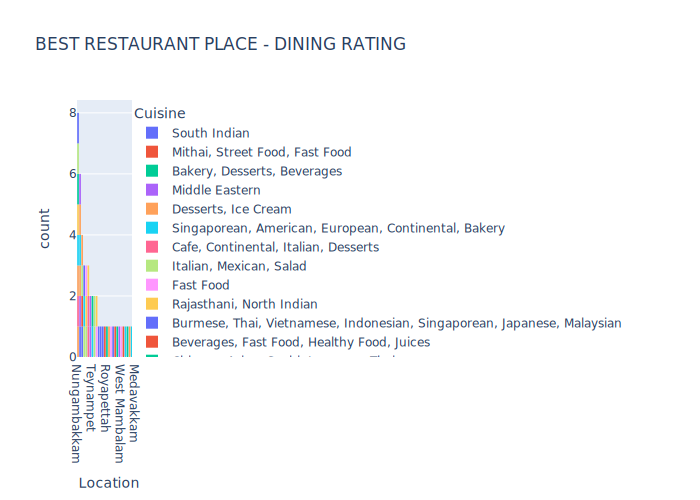

In [63]:
fig = px.histogram(highest_rated_df, x='Location', color='Cuisine',
 title= 'BEST RESTAURANT PLACE - DINING RATING').update_xaxes(categoryorder="total descending")
fig.show()

In [251]:
chinese_df = zomatoChennai_df[zomatoChennai_df['Cuisine'].str.contains('Chinese')]
chinese_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Rating Type,Rating_Category
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fund...",Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",Average,Average
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, C...",Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating",Average,Average
5,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, Sa...",Medavakkam,"South Indian, North Indian, Chinese","Chicken Grill, Shawarma, Naan, Chicken Butt...",450.0,4.1,567,3.8,24700,"Home Delivery, Indoor Seating",Average,Good
8,Savoury Sea Shell,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"Arabian, Chinese, North Indian, Lebanese, ...","Shawarma, Chicken Grill, Brownie, Sea Food,...",1400.0,4.2,2564,4.1,21700,"Home Delivery, Indoor Seating, Card Upon Deliv...",Average,Average
9,Sangeetha Veg Restaurant,"102/82, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"South Indian, North Indian, Chinese, Chetti...","Filtered Coffee, Chaat, Faluda, Masala Dosa...",800.0,4.4,1578,4.2,39600,"Breakfast, Home Delivery, Vegetarian Only, Ind...",Average,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12014,Bowl Bazaar,Delivery Only,Adyar,"North Indian, South Indian, Chinese, Biryani",Invalid,500.0,0.0,0,0.0,0,Delivery Only,Poor,Poor
12015,Bowl Bazaar,Delivery Only,Medavakkam,"North Indian, South Indian, Chinese, Biryani",Invalid,500.0,0.0,0,0.0,0,Delivery Only,Poor,Poor
12016,Bowl Bazaar,Delivery Only,Perungudi,"North Indian, South Indian, Chinese",Invalid,400.0,0.0,0,0.0,0,Delivery Only,Poor,Poor
12017,Bowl Bazaar,Delivery Only,Medavakkam,"North Indian, South Indian, Chinese",Invalid,400.0,0.0,0,0.0,0,Delivery Only,Poor,Poor


In [253]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head()

,Location,Cuisine,Price for 2
0,Adyar,"Chinese, Thai",800.0
1,Adyar,Ice Cream,200.0
2,Adyar,"North Indian, Chettinad, Mughlai, Desserts,...",1800.0
3,Adyar,South Indian,500.0
4,Alwarpet,"Desserts, Ice Cream",350.0


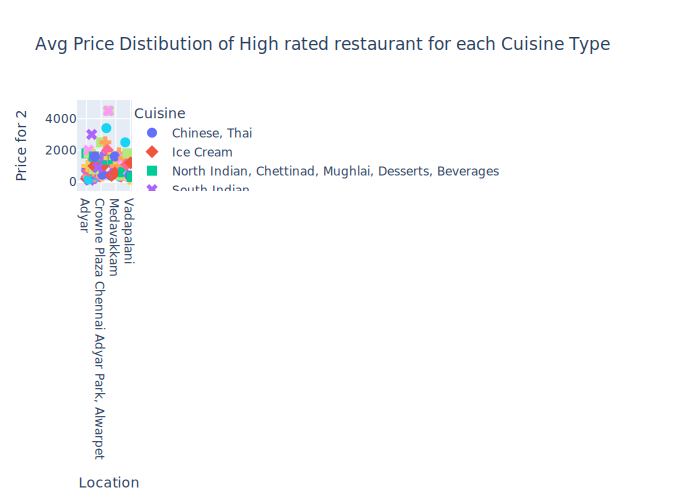

In [254]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine", symbol="Cuisine",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

In [ ]:
chinese_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese_df

In [ ]:
chinese_rest_df = chinese_df.groupby(by='REGION').agg({'NAME' : 'count', 'PRICE' : 'mean'}).rename(columns= {'NAME' : 'COUNT OF RESTAURANTS'})
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False)
chinese_rest_df.head()

In [ ]:
chinese_rest_df

In [ ]:
chinese_rest_df.reset_index(inplace=True)

In [ ]:
fig = px.bar(chinese_rest_df, x='REGION', y='COUNT OF RESTAURANTS', color='PRICE', title= 'No. of Chinese Restaurant by Places')

fig.show()

In [ ]:
price_rating_df = zomato_df.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()
price_rating_df

In [ ]:
fig = px.line(price_rating_df, y="PRICE", x="RATING",color='CUSINE TYPE')

In [ ]:
fig.show()

In [ ]:
region_price_df = zomato_df.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price_df

In [ ]:
fig = px.scatter(region_price_df, x="REGION", y="PRICE").update_traces(marker_size=8)
fig.show()

In [ ]:
max_price = zomato_df['PRICE'].max()
one_fourth_price = max_price/4
one_fourth_price

In [ ]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restaurant
aff_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
aff_rest_df = aff_rest_df[aff_rest_df['PRICE'] <= 1250]
aff_rest_df.sort_values(by='PRICE', inplace=True)
aff_rest_df

In [ ]:
# Finding the highest rated list of restaurants
highrate_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['RATING'] >= 4.5]
highrate_rest_df.sort_values(by='PRICE', inplace=True)
highrate_rest_df

In [ ]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['NAME', 'REGION'])
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
highrate_aff_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)

In [ ]:
# Affordable Restaurants with low price and high rating
highrate_aff_df

In [ ]:
mean_votes = zomato_df['VOTES'].mean()
mean_votes

In [ ]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'VOTES']]
mean_rest_df = mean_rest_df[mean_rest_df['VOTES'] > 177]
mean_rest_df.sort_values(by='VOTES', inplace=True)
mean_rest_df

In [ ]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME', 'REGION'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)

In [ ]:
reliable_rest_df

In [ ]:
zomato_df.to_csv('Mumbai_Zomato.csv', header=True, index=False)

# es